Based on aspects of building location and construction, your goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

### Data Description

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

- 1 represents low damage
- 2 represents a medium amount of damage
- 3 represents almost complete destruction


| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| geo_level_1_id, geo_level_2_id, geo_level_3_id|geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.	|
|count_floors_pre_eq |number of floors in the building before the earthquake	|
|age |	age of the building in years|
|area_percentage |	normalized area of the building footprint|
|height_percentage |normalized height of the building footprint	|
|land_surface_condition |surface condition of the land where the building was built. Possible values: n, o, t.	|
|foundation_type |type of foundation used while building. Possible values: h, i, r, u, w	|
|roof_type |type of roof used while building. Possible values: n, q, x	|
|ground_floor_type |type of the ground floor. Possible values: f, m, v, x, z.	|
|other_floor_type |type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.	|
|position |	position of the building. Possible values: j, o, s, t.|
|plan_configuration |building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.	|
|has_superstructure_adobe_mud |	flag variable that indicates if the superstructure was made of Adobe/Mud.|
|has_superstructure_mud_mortar_stone |flag variable that indicates if the superstructure was made of Mud Mortar - Stone.|
|has_superstructure_stone_flag |flag variable that indicates if the superstructure was made of Stone.	|
| |	|
| |	|
| |	|

### Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.2)

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential, save_model
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from tensorflow.keras.optimizers import Adam

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from keras.optimizers import Adam, Adagrad, RMSprop, SGD

#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)
tf.random.set_seed(0)

### Data Exploration

In [2]:
df = pd.read_csv("quake.csv")

In [3]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
df.describe(include='all')

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.hist(bins=50, figsize=(20,30), layout=(15,3))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [ ]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Data Preprocessing

### Drop features

In [6]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_u

In [7]:
df.drop(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'land_surface_condition', 'foundation_type', 
         'roof_type', 'ground_floor_type', 'other_floor_type','position', 'plan_configuration',
         'legal_ownership_status','has_secondary_use', 'has_secondary_use_agriculture', 
         'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 
         'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 
         'has_secondary_use_gov_office','has_secondary_use_use_police', 'has_secondary_use_other'],axis=1, inplace=True)

In [8]:
df.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
0,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,3
1,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,2
2,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,3
3,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,2
4,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,3


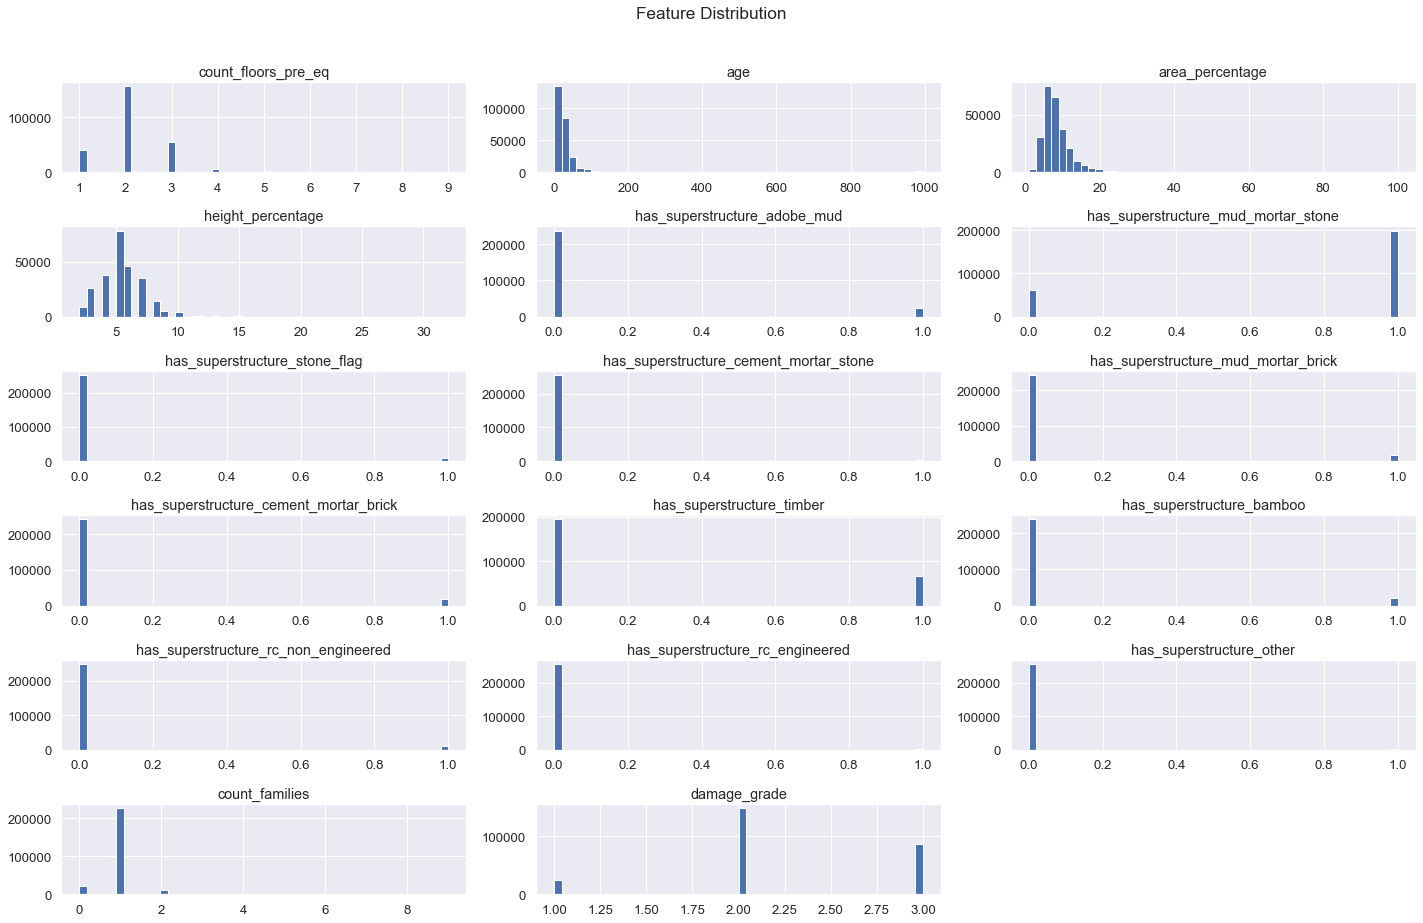

In [9]:
df.hist(bins=50, figsize=(20,30), layout=(15,3))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [10]:
#df.to_csv("quaketrain.csv",index=False)

### Treat Duplicate Values

In [11]:
df.duplicated(keep='first').sum()

180806

In [12]:
df[df.duplicated(keep=False)]

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
0,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,3
1,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,2
2,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,3
3,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,2
4,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260595,2,20,8,5,0,1,0,0,0,0,0,0,0,0,0,1,3
260596,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,2
260597,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,3
260598,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,3


In [13]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [14]:
df

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,damage_grade
0,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,3
1,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,2
2,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,3
3,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,2
4,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79790,2,45,17,5,0,1,0,0,0,0,1,0,0,0,0,1,2
79791,3,35,17,7,0,0,0,0,0,1,0,0,0,0,0,1,2
79792,3,15,11,11,0,0,0,0,0,0,0,0,1,0,0,1,1
79793,6,0,13,12,0,0,0,0,1,0,0,0,0,0,0,1,2


In [15]:
#df.to_csv("quaketrain.csv",index=False)

### Train Test Split

In [16]:
df = pd.read_csv("quaketrain.csv")

In [17]:
df.shape

(79795, 17)

In [18]:
X = df.iloc[:,0:16]
y = df.iloc[:,16]

In [19]:
X.values, y.values

(array([[ 2, 30,  6, ...,  0,  0,  1],
        [ 2, 10,  8, ...,  0,  0,  1],
        [ 2, 10,  5, ...,  0,  0,  1],
        ...,
        [ 3, 15, 11, ...,  0,  0,  1],
        [ 6,  0, 13, ...,  0,  0,  1],
        [ 3, 10,  7, ...,  0,  0,  3]], dtype=int64),
 array([3, 2, 3, ..., 1, 2, 3], dtype=int64))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63836, 16), (15959, 16), (63836,), (15959,))

### Treat Imbalance Data

In [22]:
y.value_counts()

2    42663
3    24502
1    12630
Name: damage_grade, dtype: int64

In [ ]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [ ]:
new_X, new_y = ros.fit_resample(X, y)

In [ ]:
new_y.value_counts()

In [ ]:
new_X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_X.values, new_y.values, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Feature Scaling (If not using Batch Normalization)

In [23]:
X_train

array([[ 3,  5, 16, ...,  0,  0,  1],
       [ 2, 40,  9, ...,  0,  0,  1],
       [ 3, 25,  6, ...,  0,  0,  1],
       ...,
       [ 1, 55,  6, ...,  0,  0,  1],
       [ 2, 70, 13, ...,  0,  0,  1],
       [ 4, 35,  9, ...,  0,  0,  1]], dtype=int64)

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[0.33333333, 0.00502513, 0.15789474, ..., 0.        , 0.        ,
        0.11111111],
       [0.16666667, 0.04020101, 0.08421053, ..., 0.        , 0.        ,
        0.11111111],
       [0.33333333, 0.02512563, 0.05263158, ..., 0.        , 0.        ,
        0.11111111],
       ...,
       [0.        , 0.05527638, 0.05263158, ..., 0.        , 0.        ,
        0.11111111],
       [0.16666667, 0.07035176, 0.12631579, ..., 0.        , 0.        ,
        0.11111111],
       [0.5       , 0.03517588, 0.08421053, ..., 0.        , 0.        ,
        0.11111111]])

In [28]:
X_test_scaled

array([[0.16666667, 0.01005025, 0.03157895, ..., 0.        , 0.        ,
        0.11111111],
       [0.        , 0.0201005 , 0.07368421, ..., 0.        , 0.        ,
        0.11111111],
       [0.        , 0.01507538, 0.16842105, ..., 0.        , 0.        ,
        0.11111111],
       ...,
       [0.16666667, 0.06030151, 0.09473684, ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.01005025, 0.08421053, ..., 0.        , 1.        ,
        0.11111111],
       [0.33333333, 0.01005025, 0.05263158, ..., 0.        , 0.        ,
        0.        ]])

### Model Training

### Using DNN

In [29]:
model = Sequential()
model.add(Dense(units=32,activation='relu',input_dim=16))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=32,activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=4,activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1

In [31]:
checkpointcb = keras.callbacks.ModelCheckpoint("BestModel.h5",save_best_only=True)

In [32]:
earlystoppingcb = keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [33]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [34]:
model_history = model.fit(X_train_scaled, y_train,batch_size=100,epochs=50,
                          validation_split=0.2, verbose=2, callbacks=[checkpointcb,earlystoppingcb])

Epoch 1/50
511/511 - 1s - loss: 1.3443 - accuracy: 0.4607 - val_loss: 0.9966 - val_accuracy: 0.5421
Epoch 2/50
511/511 - 1s - loss: 0.9759 - accuracy: 0.5277 - val_loss: 0.9060 - val_accuracy: 0.5464
Epoch 3/50
511/511 - 1s - loss: 0.9100 - accuracy: 0.5405 - val_loss: 0.8764 - val_accuracy: 0.5464
Epoch 4/50
511/511 - 1s - loss: 0.8910 - accuracy: 0.5407 - val_loss: 0.8692 - val_accuracy: 0.5472
Epoch 5/50
511/511 - 1s - loss: 0.8835 - accuracy: 0.5441 - val_loss: 0.8650 - val_accuracy: 0.5522
Epoch 6/50
511/511 - 1s - loss: 0.8799 - accuracy: 0.5444 - val_loss: 0.8619 - val_accuracy: 0.5510
Epoch 7/50
511/511 - 1s - loss: 0.8787 - accuracy: 0.5434 - val_loss: 0.8615 - val_accuracy: 0.5531
Epoch 8/50
511/511 - 1s - loss: 0.8768 - accuracy: 0.5425 - val_loss: 0.8595 - val_accuracy: 0.5516
Epoch 9/50
511/511 - 1s - loss: 0.8745 - accuracy: 0.5439 - val_loss: 0.8582 - val_accuracy: 0.5504
Epoch 10/50
511/511 - 1s - loss: 0.8740 - accuracy: 0.5435 - val_loss: 0.8568 - val_accuracy: 0.5492

In [35]:
model_history.params

{'verbose': 2, 'epochs': 50, 'steps': 511}

In [36]:
model_history.history

{'loss': [1.3442515134811401,
  0.9758948683738708,
  0.910033106803894,
  0.8910254836082458,
  0.8834524750709534,
  0.8799141049385071,
  0.8787345290184021,
  0.8768424391746521,
  0.8745318055152893,
  0.8739842176437378,
  0.8721529841423035,
  0.8711961507797241,
  0.8696265816688538,
  0.86867755651474,
  0.86920565366745,
  0.8697211146354675,
  0.8673186302185059,
  0.8662301301956177,
  0.8666653633117676,
  0.8669756054878235,
  0.8656286597251892,
  0.8654379844665527,
  0.8644537925720215,
  0.8646778464317322,
  0.864128589630127,
  0.863778293132782,
  0.8630547523498535,
  0.8644654750823975,
  0.8626989126205444,
  0.864393949508667,
  0.8630870580673218,
  0.8626255393028259,
  0.8616563677787781,
  0.862004816532135,
  0.8615683317184448,
  0.8611353635787964,
  0.8622293472290039,
  0.8608677983283997,
  0.8623180985450745,
  0.8615978956222534,
  0.8609471321105957,
  0.8615081310272217,
  0.8606938719749451,
  0.860903799533844,
  0.8614557981491089,
  0.86204302

In [37]:
pd.DataFrame(model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.344252,0.460699,0.996594,0.542058
1,0.975895,0.527689,0.906049,0.546366
2,0.910033,0.540534,0.876363,0.546444
3,0.891025,0.540730,0.869154,0.547227
4,0.883452,0.544098,0.865029,0.552162
5,0.879914,0.544392,0.861859,0.550987
6,0.878735,0.543374,0.861470,0.553101
7,0.876842,0.542492,0.859476,0.551613
8,0.874532,0.543902,0.858181,0.550439
9,0.873984,0.543452,0.856839,0.549185


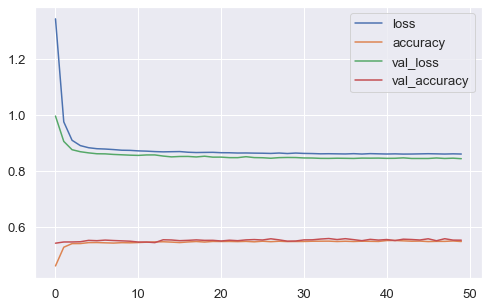

In [38]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()#.set_ylim(0,1)
plt.show()

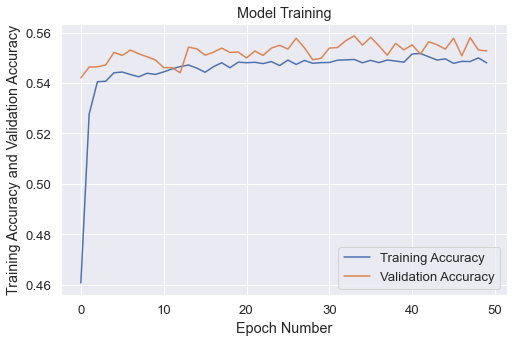

In [41]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Training")
plt.ylabel("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

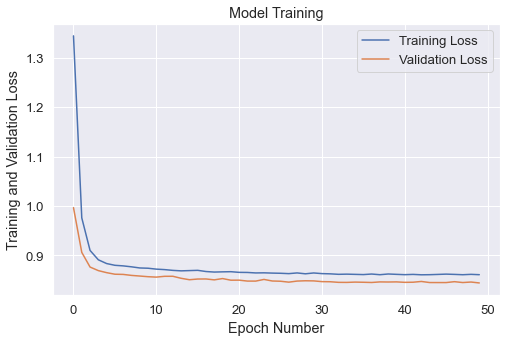

In [39]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Training")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

### Model Evaluation

In [42]:
model.get_weights()

[array([[-0.336797  , -0.3887645 ,  0.08544168,  0.423037  ,  0.1778256 ,
          0.26241532,  0.33464244, -0.17592627,  0.82840055,  0.07862347,
          0.23033185,  0.31313044, -0.10590601, -0.05994845, -0.21583536,
         -0.06269474,  0.33855987,  0.09248093, -0.04866735, -0.13837832,
         -0.128099  ,  0.04744305,  0.3663404 ,  0.54198223, -0.05678255,
          0.19191445,  0.06031823, -0.287016  , -0.5205188 ,  0.02878445,
          0.05628702, -0.11132596],
        [-2.4654083 , -0.11749251, -1.9086872 ,  0.088976  ,  0.07698984,
          0.45808035,  0.13812928, -2.8041391 , -0.00505302, -0.0028016 ,
         -1.1312205 ,  0.18079042,  0.14591807, -0.22650237, -0.01124847,
         -0.0160642 ,  0.1636969 ,  0.10972351,  0.43872544,  0.14568429,
          0.28417572, -2.619799  ,  0.15979934,  0.13672633, -0.06524541,
         -1.4996741 , -1.3350735 , -2.7523334 ,  0.54462075, -0.19748086,
          0.04230333,  0.07520515],
        [ 0.00740641, -0.36949205,  0.05

In [43]:
test_loss, test_acc = model.evaluate(X_test_scaled,y_test)

499/499 [==============================] - 0s 728us/step - loss: 0.8469 - accuracy: 0.5581


In [44]:
print("Test Accuracy: {}".format(test_acc))

Test Accuracy: 0.55805504322052


### Model Prediction

In [51]:
y_pred = model.predict(X_test_scaled)

In [52]:
y_pred

array([[0.00000007, 0.20244408, 0.7050955 , 0.09246034],
       [0.00000259, 0.07368319, 0.48229778, 0.44401646],
       [0.00000374, 0.0935278 , 0.54366934, 0.36279908],
       ...,
       [0.00000044, 0.04268945, 0.58876294, 0.3685472 ],
       [0.00000668, 0.3264983 , 0.5033292 , 0.17016576],
       [0.00000078, 0.05535932, 0.5999037 , 0.3447362 ]], dtype=float32)

In [53]:
y_pred.round(2)

array([[0.  , 0.2 , 0.71, 0.09],
       [0.  , 0.07, 0.48, 0.44],
       [0.  , 0.09, 0.54, 0.36],
       ...,
       [0.  , 0.04, 0.59, 0.37],
       [0.  , 0.33, 0.5 , 0.17],
       [0.  , 0.06, 0.6 , 0.34]], dtype=float32)

In [56]:
y_class_pred =  model.predict_classes(X_test_scaled)

In [57]:
y_class_pred 

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [58]:
y_test

array([2, 2, 2, ..., 3, 3, 2], dtype=int64)

In [59]:
cm = confusion_matrix(y_test,y_class_pred)
cm

array([[ 574, 1877,   18],
       [ 388, 7900,  365],
       [  32, 4373,  432]], dtype=int64)

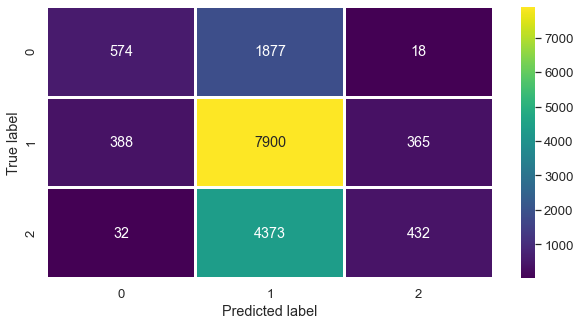

In [60]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# fig , ax = plt.subplots(figsize=(10,5))
# plot_confusion_matrix(model,X_test,y_test,values_format='.4g',ax=ax)
# plt.show()

In [ ]:
print(classification_report(y_test,y_class_pred))

In [ ]:
# plot_roc_curve(model,X_test,y_test)
# plt.show()

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

In [ ]:
n = len(X_test)
n

In [ ]:
p = X_test.shape[1]
p

In [ ]:
adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
adjr2

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Cross Validation

Build a model (regression or classfier) first

In [ ]:
def build_regressor():
    model = Sequential()
    model.add(Dense(units=48,activation='relu',input_dim=14))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=48,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=["accuracy"])
    return model

In [ ]:
def build_classifier():
    model = Sequential()
    model.add(Dense(units=48,activation='relu',input_dim=14))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=48,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [ ]:
model = KerasRegressor(build_fn=build_regressor, batch_size=500, epochs=50)

In [ ]:
model = KerasClassifier(build_fn=build_classifier, batch_size=500, epochs=50)

In [ ]:
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)

In [ ]:
cv = cross_val_score(estimator=model,X=X_train, y=y_train, cv=kfold, n_jobs=-1, verbose=2)

In [ ]:
cv = cross_val_score(estimator=model,X=X_train, y=y_train, cv=5, n_jobs=-1, verbose=2)

In [ ]:
cv

In [ ]:
cv.mean()

In [ ]:
cv.std()

### Model Hyperparameter Tuning

### Create a regressor or classifier function

In [ ]:
def build_regressor():
    model = Sequential()
    model.add(Dense(units=48,activation='relu',input_dim=14))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=48,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=["accuracy"])
    return model

In [ ]:
def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(units=48,activation='relu',input_dim=14))
    model.add(Dense(units=48,activation='relu'))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [ ]:
model = KerasRegressor(build_fn=build_regressor)

In [ ]:
model = KerasClassifier(build_fn=build_classifier)

In [ ]:
params = {'batch_size':[100,200,500],
          'epochs' : [20,40,60],
          'optimizer' : ['Adam', 'RMSprop', 'SGD']
         
         }

### Use RandomSearch CV

In [ ]:
randomsearch = RandomizedSearchCV(estimator=model, param_distributions=params,n_iter=30,
                                  scoring='accuracy',n_jobs=-1,cv=5)

In [ ]:
randomsearchcv = randomsearch.fit(X_train, y_train)

In [ ]:
randomsearchcv.best_params_

In [ ]:
randomsearchcv.best_score_

### Use GridSearch CV

In [ ]:
grid = GridSearchCV(estimator=classifier, param_grid=params, verbose=1, n_jobs=-1, scoring='accuracy',cv=5)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

### Save the Model

In [ ]:
model.save("quakednn.h5")